# Using the OmicsIntegrator Package

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx

# Use the following lines to test the basic functionality of the package if developing locally: 
import sys
sys.path.insert(0, "/Users/alex/Documents/OmicsIntegrator2/src")
from graph import *

# import OmicsIntegrator as oi

interactome_file = "/Users/alex/Documents/OmicsIntegrator2/data/iref13.cleaned.connected.tsv"
prize_file = "/Users/alex/Documents/OmicsIntegrator2/data/prizes.tsv"
graph = Graph(interactome_file, {'a':100000000})

graph.prepare_prizes(prize_file)


08:08:53 - Graph: INFO - Duplicated edges in the interactome file (we'll keep the max cost):
08:08:53 - Graph: INFO - []
08:08:54 - Graph: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
08:08:54 - Graph: INFO - ['CTGF', 'EZR', 'HSPA5']
08:08:54 - Graph: INFO - Members of the prize file not present in the interactome:
08:08:54 - Graph: INFO - ['CALM1', 'KIAA1543', 'PKM2', 'PLEC1', 'RBM14', 'SFRS1']


In [2]:
vertex_indices, edge_indices = graph.pcsf()

In [14]:
forest, augmented_forest = graph.output_forest_as_networkx(vertex_indices, edge_indices)
forest

/Users/alex/Documents/OmicsIntegrator2/src/graph.py:358: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  nx.set_node_attributes(forest, self.node_attributes.loc[list(forest.nodes())].dropna(how='all').to_dict(orient='index'))
/Users/alex/Documents/OmicsIntegrator2/src/graph.py:729: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  nx.set_node_attributes(nxgraph, subcellular.loc[list(nxgraph.nodes())].dropna(how='all').to_dict(orient='index'))


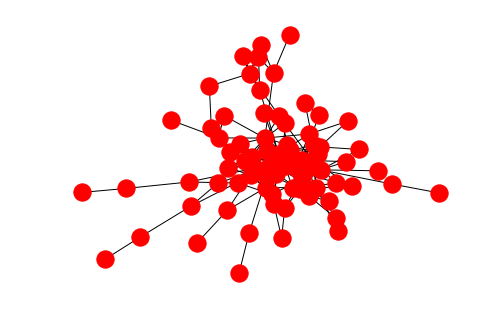

In [15]:
nx.draw_spring(augmented_forest)

In [16]:
graph.pcsf_objective_value(forest)

20.350854129999981

In [17]:
get_networkx_graph_as_dataframe_of_nodes(augmented_forest).head()

,betweenness,degree,location,louvainClusters,prize
ABI3,0.0263158,26,plasma_membrane,1,NaN
ATG12,0.0508391,67,vesicle,6,NaN
BCAR1,0.0206567,78,plasma_membrane,0,0.29
CASP6,0.000602339,52,cytoplasm,3,NaN
CD47,0,18,vesicle,0,NaN


In [18]:
output_networkx_graph_as_interactive_html(augmented_forest, '.')

'/Users/alex/Documents/OmicsIntegrator2/example/graph.html'